In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cwd = os.getcwd()
print(cwd)

\\ad\ap\homes$\kmp57\My Documents\GitHub\grid-uk-ml\notebooks


### Load Data

In [2]:
path = r"..\data"
filename = "\df_clean.csv"
df = pd.read_csv(path + filename)
#df.reset_index()

df['Datetime'] = pd.to_datetime(df['Datetime'], format="%Y/%m/%d %H:%M:%S")
df = df.set_index("Datetime")


other_cols = ["hydro_perc",
    "other_perc",
    "storage_perc"]

df['other_perc'] = df[other_cols].sum(axis=1)


df["demand_forecast_error"] = (df["demand_forecast"] - df["demand_outturn"])/df["national_demand"]*100
df["wind_forecast_error"] = (df["wind_forecast"] - df["total_wind_power"])/df["total_wind_power"]*100

df.head()

,national_demand,pump_demand,demand_forecast,demand_outturn,demand_forecast_publishdate,f01,f02,f03,f04,f05,...,total_wind_power,wind_forecast_publishdate,wind_forecast,temperature_deg,cloudcover_perc,windspeed_kmh,winddirection_degr,import_export_electricity,demand_forecast_error,wind_forecast_error
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-11-01 00:30:00,20724,1476,20370,20530,2021-10-31T08:45:00,0.008494,0.000077,0.000027,1.611739e-05,1.287691e-05,...,10267.074,2021-10-31T07:19:46,9176.0,7.1,73,23.7,222.0,1704,-0.772052,-10.626923
2021-11-01 01:00:00,20512,1462,20150,20743,2021-10-31T08:45:00,0.013711,0.000029,0.000008,5.010766e-06,4.228506e-06,...,10317.332,2021-10-31T07:19:46,9285.0,7.5,80,24.7,214.0,1361,-2.890991,-10.005804
2021-11-01 01:30:00,19950,1470,19949,20503,2021-10-31T08:45:00,0.010672,0.000016,0.000002,9.573108e-07,7.481108e-07,...,10091.954,2021-10-31T07:19:46,9402.0,7.5,80,24.7,214.0,1306,-2.776942,-6.836674
2021-11-01 02:00:00,19277,1414,19553,19924,2021-10-31T08:45:00,0.020586,0.000015,0.000002,9.279950e-07,7.399787e-07,...,10187.366,2021-10-31T07:19:46,9525.0,7.7,100,25.6,215.0,340,-1.924573,-6.501838
2021-11-01 02:30:00,18909,1296,19123,19261,2021-10-31T08:45:00,0.005257,0.000020,0.000006,2.867731e-06,2.522290e-06,...,10128.426,2021-10-31T07:19:46,9652.0,7.7,100,25.6,215.0,182,-0.729811,-4.703850


### Plot Freq Bands

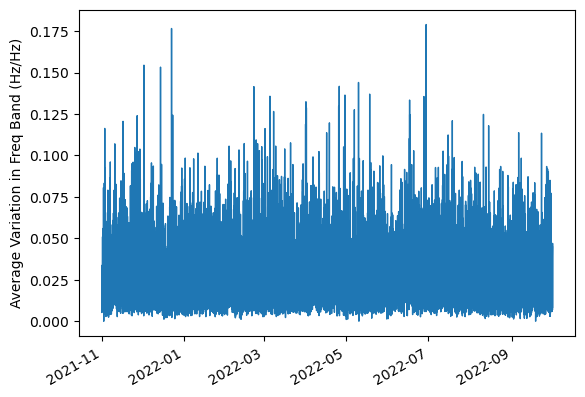

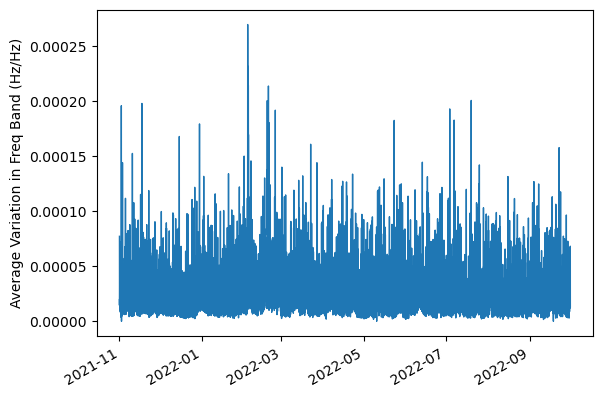

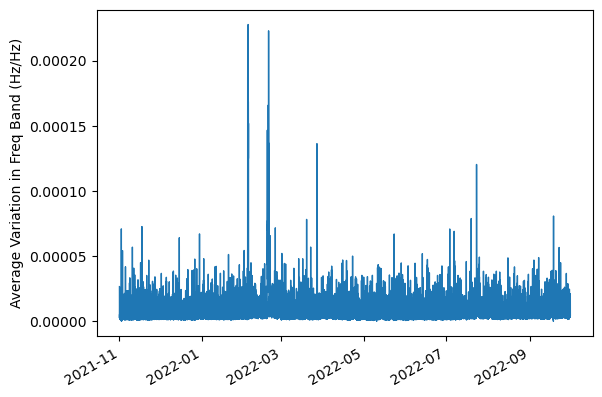

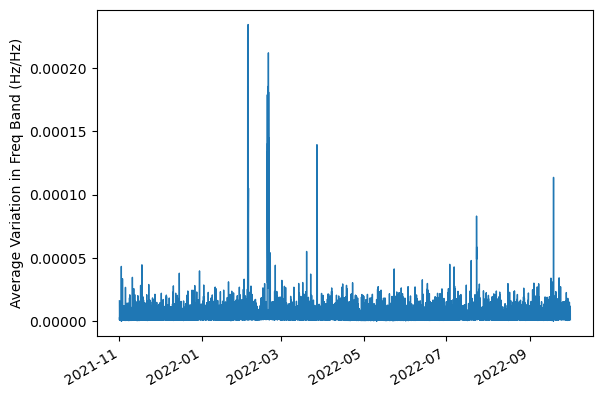

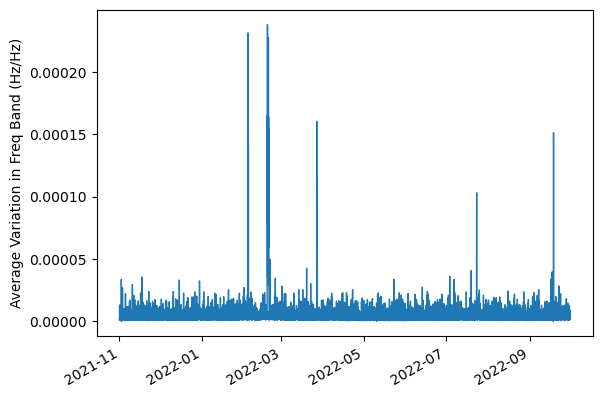

In [75]:
f_cols = ['f01','f02','f03','f04','f05']
f_labels = ['0-1 Hz','1-2 Hz','2-3 Hz',
           '3-4 Hz','4-5 Hz']
for ii in range(0,5):    
    fig, ax = plt.subplots() 
    df[f_cols[ii]].plot(linewidth=1)
#     plt.legend(f_labels[ii],loc='lower left')
    
    plt.xlabel('')
    plt.ylabel('Average Variation in Freq Band (Hz/Hz)')
    
    filename = "Plots\\freq_band" + str(ii) +".png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')




### Locate Anomalous Events

In [63]:
n = 1000
events_pos_all = df.nlargest(n,"f05")


events_pos = events_pos_all.reset_index()
idx_pos_select = []


max_tdiff = pd.Timedelta(days = 2)

for ii in range(0,100):
    # Select largest deviations
    idx_pos_select.append(events_pos.index[0])
    
    # Remove events with between tdiff from selected event
    t_min = events_pos['Datetime'].iloc[0] - max_tdiff
    t_max = events_pos['Datetime'].iloc[0] + max_tdiff
    
    tdiff_idx = np.where(np.logical_or(events_pos['Datetime']<t_min,events_pos['Datetime']>t_max))
    events_pos = events_pos.iloc[tdiff_idx]
    
events_pos = events_pos_all.iloc[idx_pos_select]

events_pos.head()

,national_demand,pump_demand,demand_forecast,demand_outturn,demand_forecast_publishdate,f01,f02,f03,f04,f05,...,total_wind_power,wind_forecast_publishdate,wind_forecast,temperature_deg,cloudcover_perc,windspeed_kmh,winddirection_degr,import_export_electricity,demand_forecast_error,wind_forecast_error
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-02-18 15:30:00,33840,17,32829,33148,2022-02-17T08:45:00,0.008905,0.000138,0.000070,0.000103,0.000238,...,8881.154,2022-02-17T07:47:45,8453.0,4.4,100,55.9,168.0,3852,-0.942671,-4.820928
2022-02-04 04:00:00,22170,775,21796,22105,2022-02-03T08:45:00,0.021961,0.000084,0.000048,0.000056,0.000231,...,10725.698,2022-02-03T07:19:27,12368.0,3.5,92,28.0,188.0,1684,-1.393775,15.311843
2022-03-27 04:00:00,20053,1348,21517,20501,2022-03-26T08:45:00,0.035409,0.000069,0.000122,0.000096,0.000160,...,1517.946,2022-03-26T07:19:55,1022.0,5.7,85,5.5,293.0,3517,5.066574,-32.672177
2022-09-18 12:30:00,22264,6,22576,22103,2022-09-17T08:45:00,0.047147,0.000076,0.000081,0.000114,0.000151,...,7087.552,2022-09-17T07:22:03,5486.0,15.1,100,14.3,152.0,4007,2.124506,-22.596688
2022-07-23 14:00:00,21605,64,20500,21743,2022-07-22T08:45:00,0.012229,0.000050,0.000044,0.000059,0.000103,...,6575.864,2022-07-22T07:22:25,6519.0,17.5,100,30.6,272.0,705,-5.753298,-0.864738


###  Extract Data from Days with Anomalous Events

In [64]:
def extract_same_date(date,df):
    date_idx = (df.index.date == date)
    df2 = df.iloc[date_idx]
    return df2

def extract_date_range(date,df,n_days):
    start_date = date - pd.Timedelta(days = n_days)
    end_date = date + pd.Timedelta(days = n_days+2)
    df2 = df.loc[start_date:end_date]
    return df2


event_pos_date = []
n_days = 1
for ii in range(0,5):
    date_sel = events_pos.index[ii].date()
#     event_pos_date.append(extract_same_date(date_sel,df))
    event_pos_date.append(extract_date_range(date_sel,df,n_days))


### Plot Frequency on Anomalous Days

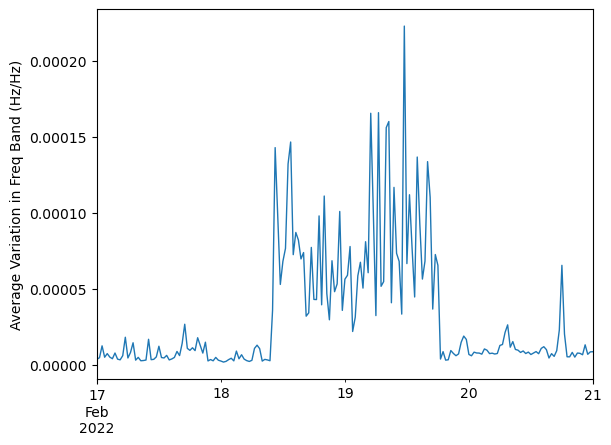

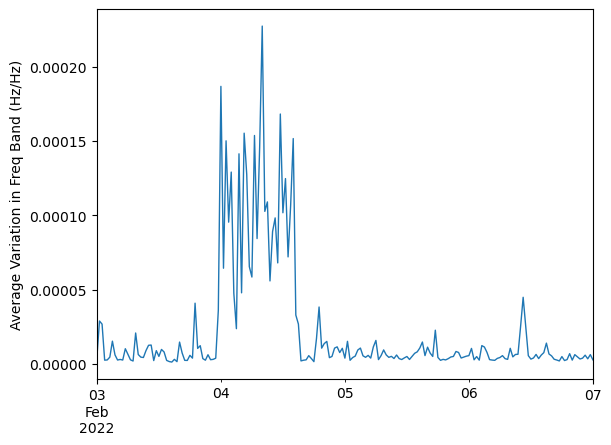

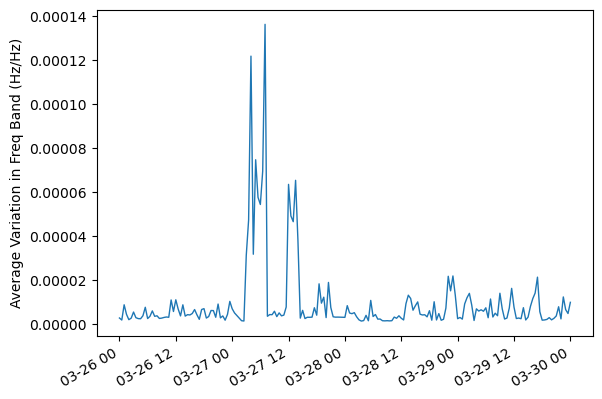

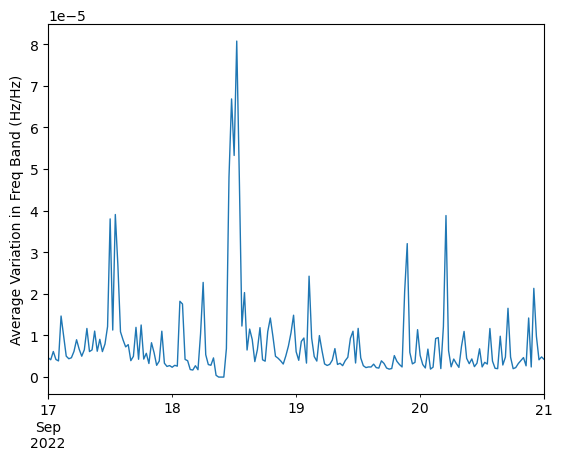

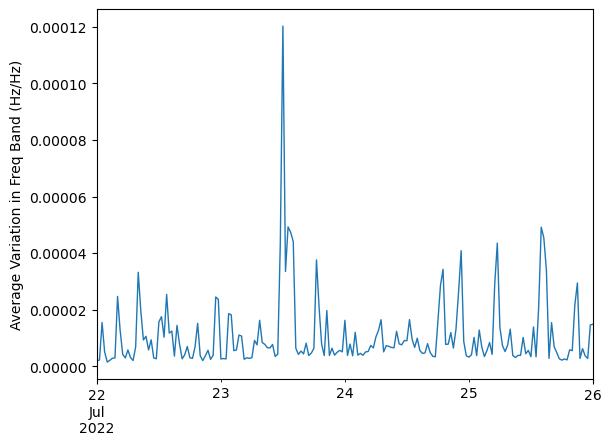

In [84]:
f_cols = ['f01','f02','f03','f04','f05']
f_labels = ['0-1 Hz','1-2 Hz','2-3 Hz',
           '3-4 Hz','4-5 Hz']
foo = 2
for ii in range(0,5):
    f_date = event_pos_date[ii].copy()
    
    fig, ax = plt.subplots() 
    f_date[f_cols[foo]].plot(linewidth=1)
#     plt.legend(f_labels[foo],loc='lower left')
#     plt.axvline(events_pos.index[ii],color = 'black')
#     etime = pd.to_datetime('2022-02-04_15:00:00',format='%Y-%m-%d_%H:%M:%S')
#     plt.axvline(etime,color = 'black')
    
    plt.xlabel('')
    plt.ylabel('Average Variation in Freq Band (Hz/Hz)')
    
    filename = "Plots\\freq_anom" + str(ii) +".png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    
    

### Plot Generation by Type on Anomalous Days

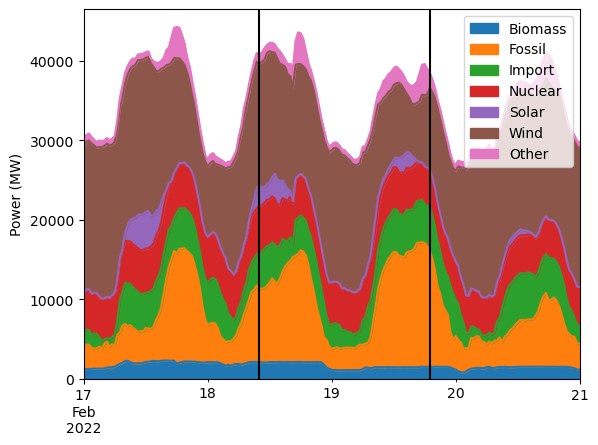

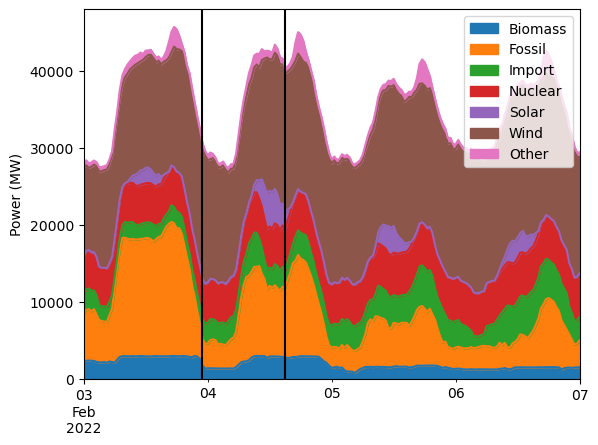

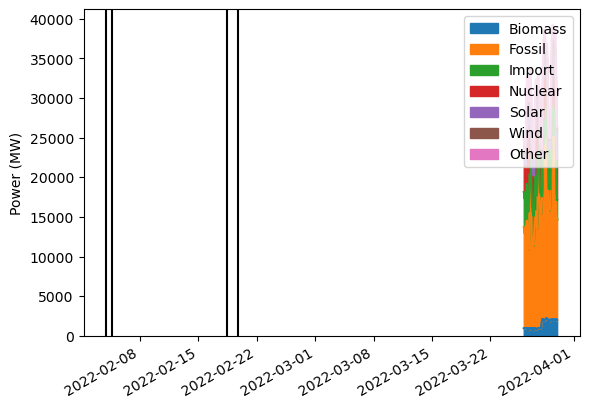

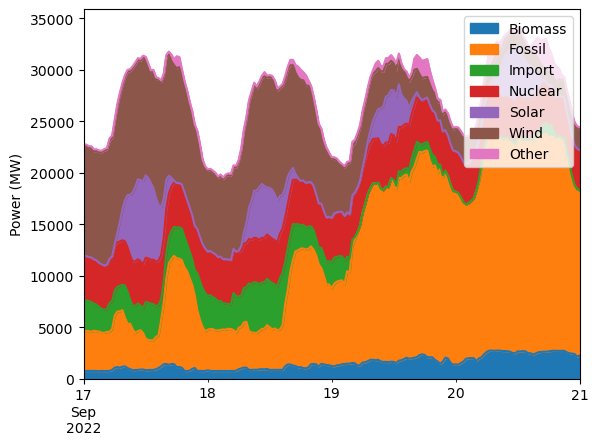

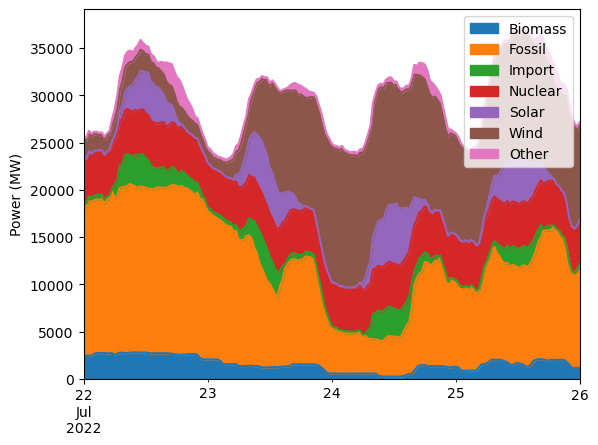

In [95]:
# %%capture --no-display
gen_columns = ["biomass_perc",
    "fossil_perc",
    "imports_perc",
    "nuclear_perc",
    "solar_perc",
    "wind_perc",
    "other_perc"]
gen_labels = ["Biomass",
    "Fossil",
    "Import",
    "Nuclear",
    "Solar",
    "Wind",
    "Other"]



for ii in range(0,5):
    gen_date = event_pos_date[ii].copy()
    gen_date[gen_columns] = gen_date[gen_columns].multiply(gen_date['generation']/100,axis = 'index')    
    gen_date[gen_labels] = gen_date[gen_columns]

    plt.rcParams['font.size'] = 10
    gen_date[gen_labels].plot.area()
    plt.legend(loc='upper right')
    
    etime = pd.to_datetime('2022-02-19_19:00:00',format='%Y-%m-%d_%H:%M:%S')
    plt.axvline(etime,color = 'black')
    
    etime = pd.to_datetime('2022-02-18_10:00:00',format='%Y-%m-%d_%H:%M:%S')
    plt.axvline(etime,color = 'black')
    
    etime = pd.to_datetime('2022-02-03_23:00:00',format='%Y-%m-%d_%H:%M:%S')

    plt.axvline(etime,color = 'black')
    
    etime = pd.to_datetime('2022-02-04_15:00:00',format='%Y-%m-%d_%H:%M:%S')
    plt.axvline(etime,color = 'black')
      
    plt.xlabel('')
    plt.ylabel('Power (MW)')
    filename = "Plots\\freq_anom_gen" + str(ii) +".png"
        
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    

### Plot Demand by Type on Anomalous Days

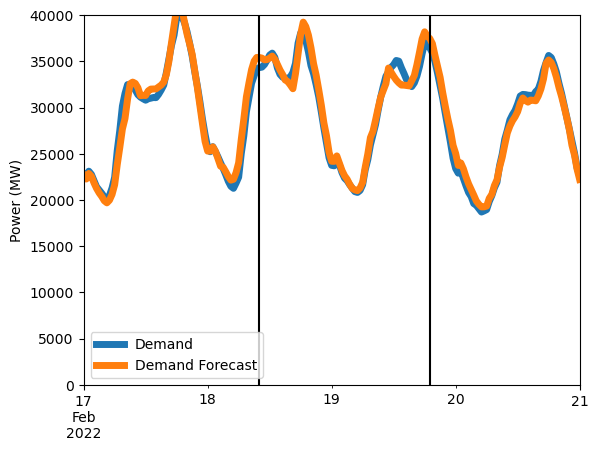

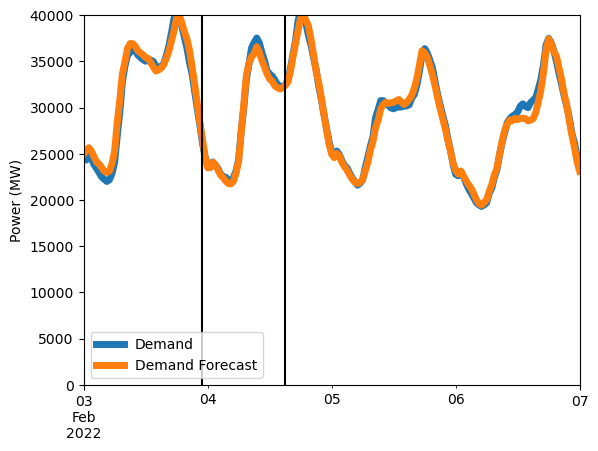

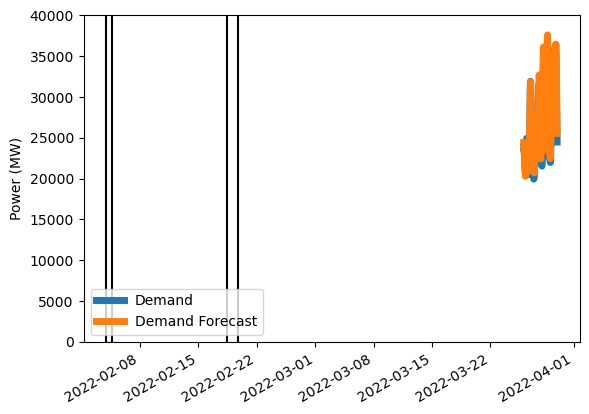

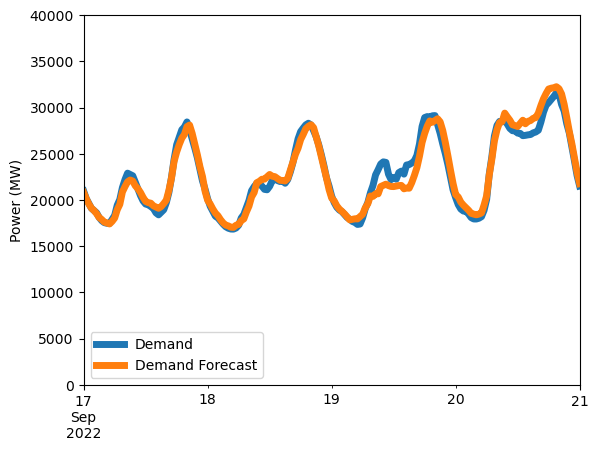

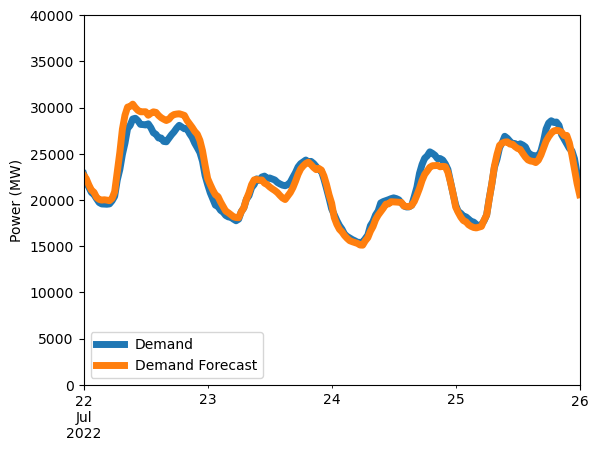

In [97]:
dem_columns = ["demand_outturn","demand_forecast"]
dem_labels = ["Demand","Demand Forecast"]

for ii in range(0,5):
    gen_date = event_pos_date[ii].copy()
    gen_date[gen_columns] = gen_date[gen_columns].multiply(gen_date['generation']/100,axis = 'index')
    
    plt.rcParams['font.size'] = 10
    gen_date[dem_columns].plot(linewidth=5)
    plt.legend(dem_labels,loc='lower left')
    
    etime = pd.to_datetime('2022-02-19_19:00:00',format='%Y-%m-%d_%H:%M:%S')
    plt.axvline(etime,color = 'black')
    
    etime = pd.to_datetime('2022-02-18_10:00:00',format='%Y-%m-%d_%H:%M:%S')
    plt.axvline(etime,color = 'black')
    
    etime = pd.to_datetime('2022-02-03_23:00:00',format='%Y-%m-%d_%H:%M:%S')

    plt.axvline(etime,color = 'black')
    
    etime = pd.to_datetime('2022-02-04_15:00:00',format='%Y-%m-%d_%H:%M:%S')
    plt.axvline(etime,color = 'black')
    
    plt.ylim([0, 40000])
    
    plt.xlabel('')
    plt.ylabel('Power (MW)')
    
    filename = "Plots\\freq_anom_dem" + str(ii) +".png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')

### Frequency Band Wind Correlation

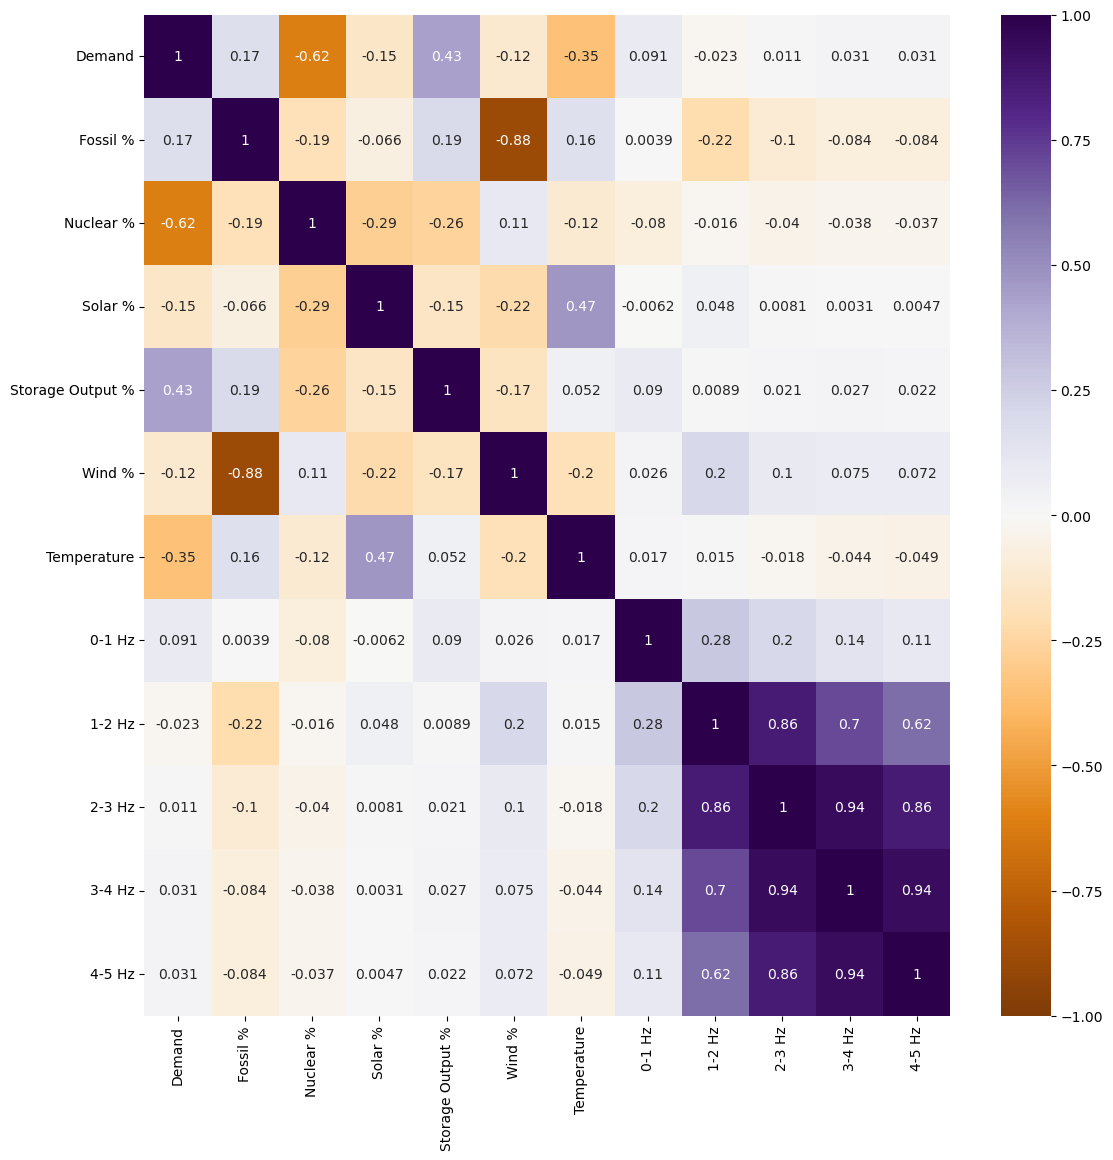

In [112]:
cols = ['national_demand','fossil_perc',
        "nuclear_perc","solar_perc","storage_perc","wind_perc",
        "temperature_deg",'f01','f02','f03','f04','f05']

labels = ['Demand',"Fossil %","Nuclear %","Solar %","Storage Output %",
            "Wind %","Temperature",'0-1 Hz','1-2 Hz','2-3 Hz',
            '3-4 Hz','4-5 Hz',]

plt.figure(figsize=(13, 13))
corr_all = df[cols].corr()

mask = np.triu(np.ones_like(corr_all, dtype=bool))

heatmap = sns.heatmap(corr_all, vmin=-1, vmax=1, annot=True, cmap='PuOr',
                      xticklabels = labels,yticklabels = labels)
plt.savefig('Plots\\freq_corr.png', dpi=300, bbox_inches='tight')